<a href="https://colab.research.google.com/github/UrielMendoza/LANOT_curso_PR_incendios/blob/main/pc_descarga_analisis_resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LANOT_curso_PR_incendios
Curso especializado de percepción remota aplicado a la detección y análisis de incendios forestales.

LANOT, Instituto de Geografía, UNAM.

26 y 27 de junio de 2023.

@autor: UrielMendoza

@date: 2023-06-23

# Descarga

1. Instalación de módulos

In [ ]:
!pip install geopandas
!pip install folium matplotlib mapclassify
!pip install cartopy
!pip install geodatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Dependencias
Las dependencias necesarias, que hemos instalado, son las siguientes:

* numpy
* pandas
* shapely (interface de GEOS)
* fiona (interface de GDAL)
* pyproj (interface de PROJ)

Además, hay otras dependencias opcionales, como:

* rtree (opcional, índice espacial para mejorar el rendimiento y necesario para operaciones de superposición).
* psycopg2 (para conexiones con PostGIS).
* GeoAlchemy2 (para escribir en PostGIS).
* geopy (para geocodificar como hemos comentado anteriormente).

Para dibujar mapas, se pueden utilizar estos paquetes adicionales:

* matplotlib
* mapclassify
* folium
* cartopy

2. Importación de módulos

In [ ]:
# Se importan las librerias necesarias
import geopandas as gpd
import psycopg2
from cartopy import crs as ccrs
from geodatasets import get_path
import matplotlib.pyplot as plt
import os

3. Conexión a la base de datos.

In [ ]:
# Establece los parámetros de conexión a la base de datos PostgreSQL
host = ''
database = ''
user = ''
password = ''
port = ''
# Establece la cadena de conexión
conn_str = f"host={host} dbname={database} user={user} password={password} port={port}"

4. Consulta fecha especifica.

In [ ]:
# Crea una conexión a la base de datos PostgreSQL
conn = psycopg2.connect(conn_str)
# Define la consulta SQL para obtener los datos geoespaciales 2023-06-16 fecha de analisis
sql_query = "SELECT * FROM puntos_10m WHERE fecha ='2023-06-16' AND estado = 'SONORA'"
# Lee los datos geoespaciales desde la base de datos
gdf = gpd.read_postgis(sql_query, conn)

# Cierra la conexión a la base de datos
conn.close()

# Ahora puedes trabajar con los datos geoespaciales en GeoDataFrame (gdf)
print(gdf.head())

/usr/local/lib/python3.10/dist-packages/geopandas/io/sql.py:170: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(


        id             x             y         lon        lat satelite  \
0  1095014 -3.025064e+06  3.061136e+06 -110.728699  30.657448  Goes-16   
1  1095330 -2.962939e+06  3.057128e+06 -109.783290  30.561945  Goes-16   
2  1095447 -3.025064e+06  3.061136e+06 -110.728699  30.657448  Goes-16   
3  1097991 -2.976968e+06  3.085184e+06 -110.157943  30.907178  Goes-16   
4  1097219 -3.027068e+06  3.061136e+06 -110.758727  30.659025  Goes-16   

   bt_c07  bt_c14  dif_c07c14       fecha      hora      land_cover  estado  \
0  314.78  294.54       20.25  2023-06-16  02:50:00        Savannas  SONORA   
1  301.33  289.39       11.94  2023-06-16  05:00:00  Open Shrubland  SONORA   
2  304.10  291.18       12.91  2023-06-16  05:50:00        Savannas  SONORA   
3  313.51  285.26       28.25  2023-06-16  23:40:00  Open Shrubland  SONORA   
4  332.38  307.58       24.80  2023-06-16  21:10:00  Open Shrubland  SONORA   

     pais   anp                         geom  
0  México  None  POINT (-110.7287

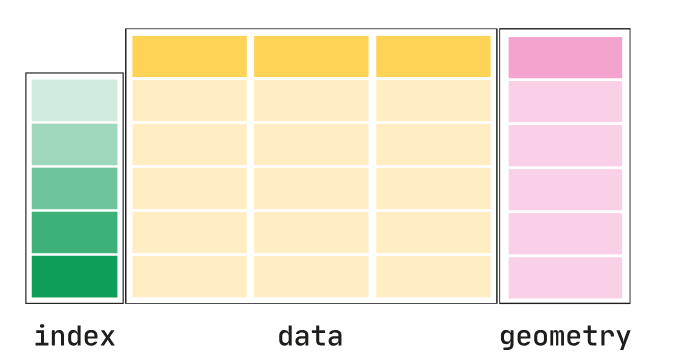

5. Plotear datos.

<Axes: >

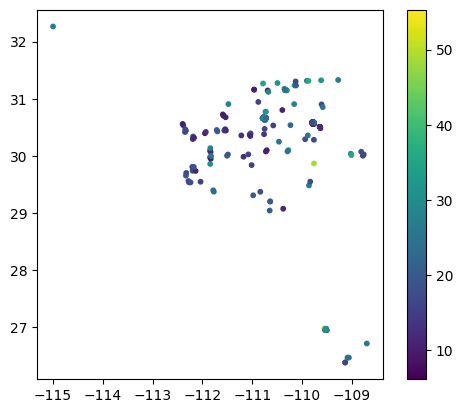

In [ ]:
# Ploteo básico
gdf.plot("dif_c07c14", legend=True, markersize=10)

<GeoAxes: >

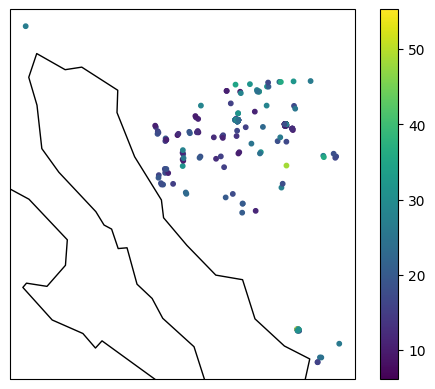

In [ ]:
path = get_path("naturalearth.land")
df = gpd.read_file(path)
crs_epsg = ccrs.epsg("3857")
df_epsg = df.to_crs(epsg="3857")
gdf_epsg = gdf.to_crs(epsg="3857")

# Genera el subplot con el crs
fig, ax = plt.subplots(subplot_kw={"projection": crs_epsg})
ax.add_geometries(
    df_epsg["geometry"], crs=crs_epsg, facecolor="white", edgecolor="black"
)

# Añade los datos a plotear
gdf_epsg.plot("dif_c07c14", ax=ax, zorder=10, legend=True, markersize=10)

In [ ]:
# Convierte la columna de fechas a cadenas de texto
gdf['fecha'] = gdf['fecha'].astype(str)
gdf['hora'] = gdf['hora'].astype(str)
# Ploteo con folium, mapa web
# ["OpenStreetMap", "Stamen Terrain", “Stamen Toner", “Stamen Watercolor" "CartoDB positron", “CartoDB dark_matter"]
gdf.explore("dif_c07c14", legend=True, tiles="OpenStreetMap", width='50%', height='50%', marker_kwds={'radius':3}, popup=True)

In [ ]:
# Uso de otros tiles
gdf.explore("dif_c07c14", legend=True, tiles="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}", attr='ESRI',  width='50%', height='50%', marker_kwds={'radius':3}, popup=True)

6. Descarga de datos.

In [ ]:
gdf.to_file('pc_20230616_sonora.shp')
os.system('zip pc_20230616_sonora.zip pc_20230616_sonora*')
os.system('rm *.cpg *.dbf *.prj *.shp *.shx')

0

7. Consultar de temporal

In [ ]:
conn = psycopg2.connect(conn_str)
# Define la consulta SQL para obtener los datos geoespaciales de 2022
sql_query = "SELECT * FROM puntos_10m WHERE fecha BETWEEN '2022-01-01' AND '2023-01-01' AND estado = 'SONORA'"
# Lee los datos geoespaciales desde la base de datos
gdf = gpd.read_postgis(sql_query, conn)

# Cierra la conexión a la base de datos
conn.close()

# Ahora puedes trabajar con los datos geoespaciales en GeoDataFrame (gdf)
print(gdf.iloc[-1])

gdf['fecha'] = gdf['fecha'].astype(str)
gdf['hora'] = gdf['hora'].astype(str)
gdf.to_file('pc_2022_sonora.shp')
os.system('zip pc_2022_sonora.shp pc_2022_sonora.*')
os.system('rm *.cpg *.dbf *.prj *.shp *.shx')

/usr/local/lib/python3.10/dist-packages/geopandas/io/sql.py:170: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(


id                                                311551
x                                        -2944903.291043
y                                          2902818.92962
lon                                          -108.682064
lat                                            28.744681
satelite                                         Goes-16
bt_c07                                            312.79
bt_c14                                            298.01
dif_c07c14                                         14.79
fecha                                         2022-05-02
hora                                            00:50:00
land_cover                                      Savannas
estado                                            SONORA
pais                                              México
anp                                                 None
geom          POINT (-108.682063612384 28.7446807288235)
Name: 2118, dtype: object


0

8. Análisis de densidad

<Axes: >

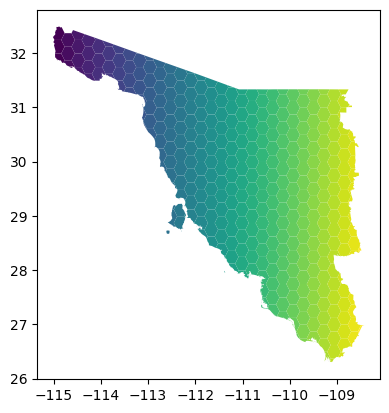

In [ ]:
# Descarga de grilla
os.system('wget http://132.247.103.145/tmp/grid_sonora.geojson')
grilla = gpd.read_file('grid_sonora.geojson')
grilla.plot(column = "id")

,id,x,y,lon,lat,satelite,bt_c07,bt_c14,dif_c07c14,fecha,hora,land_cover,estado,pais,anp,geom
0,414647,-3.019052e+06,3.083180e+06,-110.774761,30.916273,Goes-16,322.50,303.99,18.50,2022-05-25,23:10:00,Grasslands,SONORA,México,None,POINT (-110.77476 30.91627)
1,418538,-2.954923e+06,3.051116e+06,-109.630711,30.484560,Goes-16,321.11,305.19,15.92,2022-05-28,15:40:00,Open Shrubland,SONORA,México,None,POINT (-109.63071 30.48456)
2,309991,-3.081176e+06,2.974964e+06,-111.048501,29.680653,Goes-16,337.10,316.44,20.66,2022-05-01,20:20:00,Grasslands,SONORA,México,None,POINT (-111.04850 29.68065)
3,425693,-2.924863e+06,2.962939e+06,-108.709800,29.427117,Goes-16,304.07,293.40,10.67,2022-06-03,06:10:00,Savannas,SONORA,México,None,POINT (-108.70980 29.42712)
4,533543,-3.131277e+06,3.057128e+06,-112.320439,30.695933,Goes-16,317.83,298.25,19.59,2022-12-26,18:20:00,Open Shrubland,SONORA,México,None,POINT (-112.32044 30.69593)


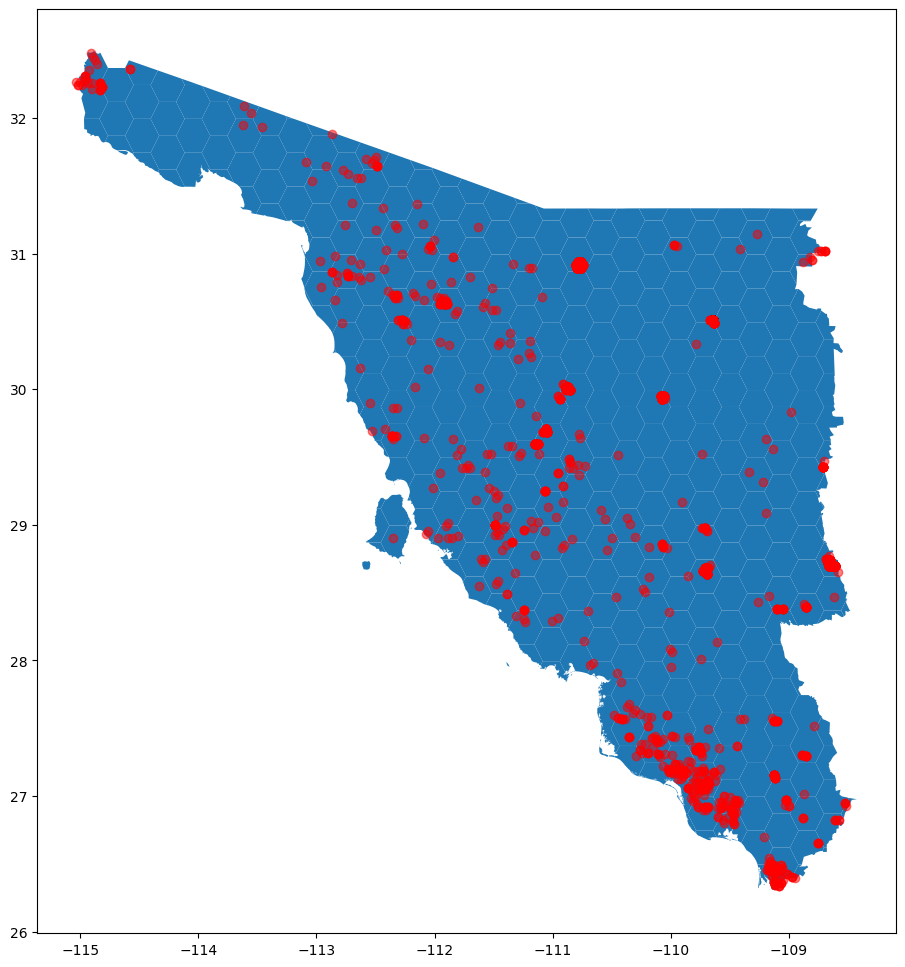

In [ ]:
# Interseccion sjoin
axis = grilla.plot(figsize = (20, 12))
gdf.plot(ax = axis, color = "red", alpha = 0.5,  figsize = (5, 3))
gdf.head()

In [ ]:
from geopandas.tools import sjoin
# Realiza el spatial join entre la malla y los puntos
grilla_sonora = sjoin(gdf, grilla, how='inner', op='within')
# Realiza el conteo de puntos por polígono
conteo_puntos = grilla_sonora.groupby('id_right').size().reset_index(name='cantidad_puntos')
# Une el resultado del conteo con la malla de polígonos
grilla_sonora_pc = grilla_sonora.merge(conteo_puntos, on='id_right', how='left')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
grilla_sonora_pc.head()

,id_left,x,y,lon,lat,satelite,bt_c07,bt_c14,dif_c07c14,fecha,...,pais,anp,geom,index_right,id_right,left,top,right,bottom,cantidad_puntos
0,414647,-3.019052e+06,3.083180e+06,-110.774761,30.916273,Goes-16,322.50,303.99,18.50,2022-05-25,...,México,None,POINT (-110.77476 30.91627),167,481,-110.939402,31.118913,-110.650727,30.868913,229
1,418213,-3.019052e+06,3.085184e+06,-110.787263,30.940294,Goes-16,297.51,287.95,9.56,2022-05-28,...,México,None,POINT (-110.78726 30.94029),167,481,-110.939402,31.118913,-110.650727,30.868913,229
2,412713,-3.019052e+06,3.083180e+06,-110.774761,30.916273,Goes-16,316.38,292.62,23.76,2022-05-25,...,México,None,POINT (-110.77476 30.91627),167,481,-110.939402,31.118913,-110.650727,30.868913,229
3,412211,-3.021056e+06,3.083180e+06,-110.804915,30.917871,Goes-16,318.17,303.63,14.54,2022-05-25,...,México,None,POINT (-110.80492 30.91787),167,481,-110.939402,31.118913,-110.650727,30.868913,229
4,412944,-3.019052e+06,3.083180e+06,-110.774761,30.916273,Goes-16,305.96,290.29,15.67,2022-05-25,...,México,None,POINT (-110.77476 30.91627),167,481,-110.939402,31.118913,-110.650727,30.868913,229


In [ ]:
# Convierte la columna de fechas a cadenas de texto
grilla_sonora_pc['fecha'] = gdf['fecha'].astype(str)
grilla_sonora_pc['hora'] = gdf['hora'].astype(str)
# Ploteo con folium, mapa web
grilla_sonora_pc.explore("cantidad_puntos", legend=True, tiles="CartoDB dark_matter", width='50%', height='50%', popup=True)

9. Análisis de proximidad

In [ ]:
# Hermosillo SONORA 29.093530791130092, -110.97251069927408
from shapely.geometry import Polygon, LineString, Point

point = Point(-110.97251069927408, 29.093530791130092)
gdf.distance(point)

<ipython-input-73-5d49d681dff4>:5: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.distance(point)


0       1.833438
1       1.932716
2       0.592020
3       2.287168
4       2.093944
          ...   
2114    1.941908
2115    0.901468
2116    1.932716
2117    1.271553
2118    2.316861
Length: 2119, dtype: float64

10. Descarga de datos.

In [ ]:
grilla_sonora_pc.to_file('grilla_sonora_pc.geojson', driver='GeoJSON')